# Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

# Regression Model

In [3]:
# Define Dataframe
df = pd.read_csv('./target.csv')
X1 = df[['days']]
X2 = df[['rate']]
y = df[['loan_amount']]

# Merge two array and create matrix
X = np.hstack((X1, X2))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create Regression Model
model = LinearRegression()

# Training Regression Model
model.fit(X_train, y_train)
print(f'Model Conf : {model.coef_}') # تتا 1
print(f'Model Intercept : {model.intercept_}') # تتا 0

# Predict Values For Real Values
y_pred = model.predict(X_test)

# Calculate The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate The R-Score
r2 = r2_score(y_test, y_pred)

# Show Result
print(f'MSE : {mse}')
print(f'R Square : {r2}')

Model Conf : [[ 0.06384015 -0.01897149]]
Model Intercept : [0.50486968]
MSE : 0.07907878480465266
R Square : -0.02002220112349562


# Plot

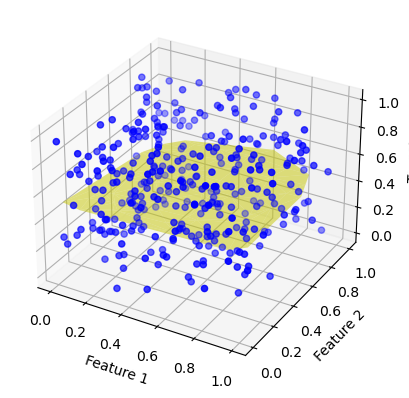

In [6]:
# Draw A Regression Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Real Data Plot
ax.scatter(X[:,0], X[:,1], y, color='blue')

# Estimated Area Drawing
ax.plot_trisurf(X_test[:,0].flatten(), X_test[:,1].flatten(), y_pred.flatten(), color='#ff0', alpha = 0.5)

# Add Labels To Plot
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.show()

# Correlation

<Axes: >

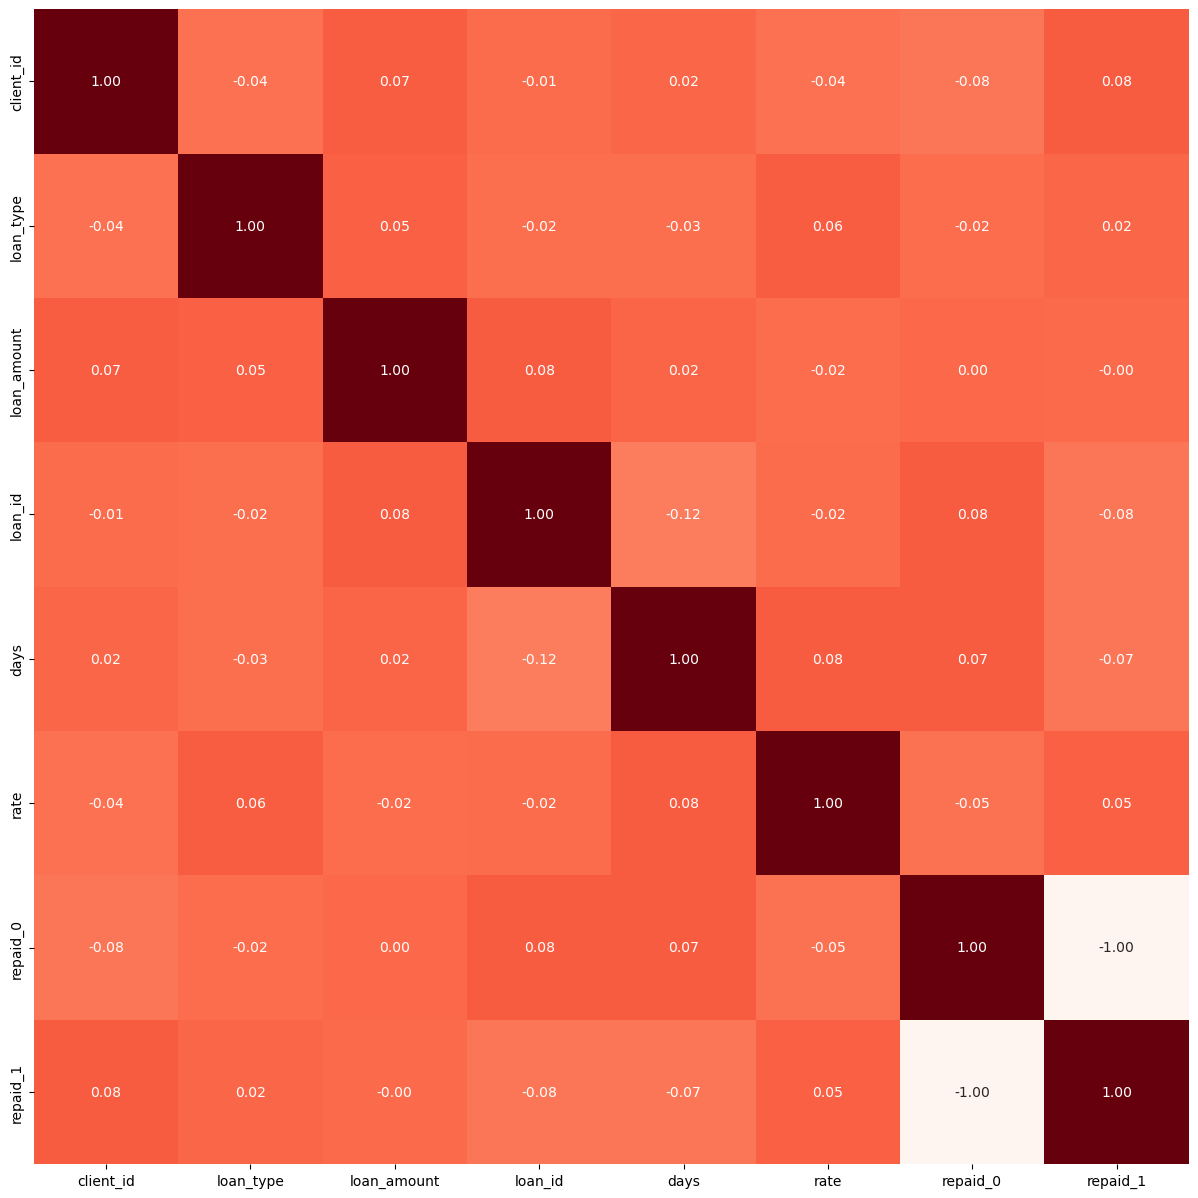

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), cbar=False, square= True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Reds')
# In This Table We Can Realize ,Correlation For All Of Features Are Too Low !So Our Prediction Can't Be Effective.